# APS 8

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from math import *
%matplotlib inline

Entrega: 28/11 ao final do atendimento (17:15)

## Questão 1

Assuma que $X$ seja uma variável aleatória contínua que descreve o preço de um multímetro digital em uma loja brasileira qualquer. Ainda, assuma que o preço médio seja igual a $R\$ 45,00$ e o desvio padrão igual a $R\$ 25,00$.

Em todos os itens a seguir, deixe claro como foi construído o novo preço em função de $X$.

Deixe todas as contas claramente indicadas.

a) Se todas as lojas brasileiras que vendem multímetro resolvessem acrescentar 15 reais no preço de cada um dos seus respectivos multímetros. Nesse caso, qual o novo preço médio do multímetro e respectivo desvio padrão?

b) Se todas as lojas brasileiras que vendem multímetro resolvessem aumentar o preço de cada um dos seus respectivos multímetros em $150\%$. Nesse caso, qual o novo preço médio do multímetro e respectivo desvio padrão?

c) Se você precisa comprar dez multímetros e deseja comprá-los todos iguais e na mesma loja. Nesse caso, qual o gasto total esperado e respectivo desvio padrão?

Respostas: 

a) O preco médio passa a ser 60,00 reais, pois foram adicionados 15 reais em todos os multímetros. O desvio padrão, por sua vez, fica igual, 25 reais.

b) O preço médio ficara 1,5 vezes maior que o original, virando 67,5 reais. O novo desvio padrão fica (1,5^2) x 25, que da 56,25 reais.

c) O gasto esperado será a média vezes o número de produtos, ou seja, 450 reais. O desvio padrão será calculado fazendo o original vezes 10^2, ou seja, 2500 reais.

## Questão 2

	
	
Assuma que, na disciplina Ciência dos dados, a nota final da disciplina seja função da nota média das provas $X$ e da nota média dos projetos $Y$. Assuma ainda que ambas as notas tem mesmo peso na construção da nota final na disciplina.


Considerando que a nota média dos alunos nas provas segue uma normal com média 4 e desvio padrão igual a 1,5, ou seja $ X \sim N(4 ; 2,25)$ . E que a nota média dos alunos nos projetos segue uma normal com média 7 e desvio padrão igual a 1, ou seja, $Y\sim N(7 ; 1)$.


Na prática, é razoável acreditar que haja uma associação positiva entre essas notas. Aqui, considere que a covariância entre essas notas médias é igual a $0,675$ .

Em todos os itens a seguir, deixe todas as contas claramente indicadas. 


a) Calcule a nota média final e respectivo desvio padrão.
   
 b) Considere que a nota final na disciplina Ciência dos dados segue uma distribuição com média e variância obtidas no item anterior.      Calcule a probabilidade de um aluno ser aprovado na disciplina.


In [5]:
##a
medproj = 7
desproj = 1
varproj = desproj**2
medprova = 4
desprova = 2.25
varprova = desprova**2
cov = 0.675

a = 0.5
b = 0.5
medfinal = a*medprova + b*medproj
varfinal = ((a**2)*varprova) + ((b**2)*varproj) + 2*a*b*cov
desfinal = sqrt(varfinal)

print(medfinal)
print(desfinal)



5.5
1.3612953390061981


A) A média final será 5.5 e o desvio padrão final será 1,3612.

In [6]:
aprov = 1-stats.norm.cdf(5,loc = medfinal, scale = desfinal)
print(aprov)

0.643301337989


B) A probabilidade de ser aprovado é 64%.

### Dataset para as questões de programação

Vamos trabalhar com o problema *House Sales in King County*, do Kaggle
[https://www.kaggle.com/harlfoxem/housesalesprediction](https://www.kaggle.com/harlfoxem/housesalesprediction)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

%matplotlib inline

In [8]:
houses = pd.read_csv("casas.csv")

In [9]:
houses.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,grade
0,540000.0,4,2.50,2600,9935,2.0,0,8
1,815000.0,3,3.75,2780,5002,2.0,0,10
2,279000.0,3,2.25,2070,7800,1.0,900,7
3,360000.0,2,2.50,1233,1244,2.0,270,7
4,309000.0,3,2.50,1990,3614,2.0,0,7


## Q3

O dataset fornecido é uma amostra extraída de um dataset maior. A amostra pode ter vindo de uma população com média de `sqft_lot` de 8250? 

Passos:

**a)** Verifique que `sqft_lot` **não** é normal.

Dica: na *APS 7* foi feito um teste de normalidade. Repita o mesmo processo

**b)**  Se `sqft_lot` fosse normal, que tipo de teste poderíamos ter usado?

**c)** Saberíamos $\mu$ para montar o t? Saberíamos $\sigma$?


**Bootstrap**:

**d)** Monte um intervalo percentil boostrap de $95\%$.

**e)** Informe os valores inferiores e superiores

**f)** Conclua o teste


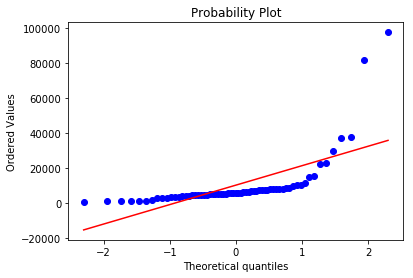

In [10]:
#Q3a
a = houses.sqft_lot
stats.probplot(a, dist='norm', plot=plt)
plt.show()

Q3b
Teste de hipótese.

Q3c
Não saberíamos o sigma, mas saberíamos o mu.

In [13]:
#Q3d
a = []
for i in houses.sqft_lot:
    a.append(i)
    
alfa = 0.05
n = len(a)
s = np.mean(a)

b = []
for i in range (10000):
    x = np.random.choice(a, size=n, replace=True).mean()
    b.append(x)


In [14]:
#Q3e
print(pd.Series(b).quantile(alfa/2))
print(pd.Series(b).quantile(1-(alfa/2)))

6924.05923076923
14634.796153846153


## Q4

Faça uma regressão que usa `sqft_living` como variável explicativa  e `price` como resultado: 

**a).** De acordo com a notação que usamos em aula, quem é $\hat{\beta_0}$ e quem é $\hat{\beta_1}$ ?

**b).** Interprete o $R^2$ , os valores $P > |t|$ e também *Prob (F-statistic)*.

**c).** Escreva a equação que expressa `price` em função de `sqft_living`.

**d).** Faça um gráfico de dispersão de `price` em função de `sqft_living`, plote a equação que encontrou no item anterior no mesmo gráfico


In [19]:
hp = houses.price
h = houses["sqft_living"]
h = sm.add_constant(h, prepend=True)
res = sm.OLS(hp,h).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     56.21
Date:                Tue, 28 Nov 2017   Prob (F-statistic):           2.70e-10
Time:                        16:11:18   Log-Likelihood:                -892.24
No. Observations:                  65   AIC:                             1788.
Df Residuals:                      63   BIC:                             1793.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const        4.928e+04   7.44e+04      0.662      0.510     -9.95e+04  1.98e+05
sqft_living   247.0810     32.954      7.498      0.000       181.227   312.935
==============================================================================
Omnibus:                       12.716   Durbin-Watson:                   1.643
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.432
Skew:                           0.973   Prob(JB):                      0.00121
Kurtosis:                       4.081   Cond. No.                     6.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Q4a - 
    B0 = 4.928e4
    B1 = 247.0810


Q4b   -   R^2 é quanto uma variável influencia em outra. P>|t| é a probabilidade de não haver relação entre as variáveis.

Q4c -  y = 4.928e4 + (247.081)x / y = preco; x = sqft_living

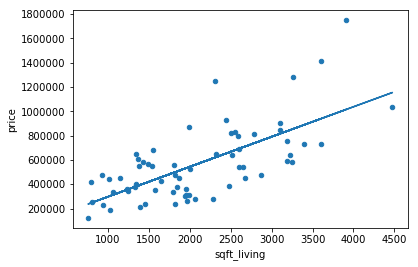

In [22]:
houses.plot.scatter("sqft_living","price")
y = 49280 + 247.081*houses["sqft_living"]
plt.plot(houses['sqft_living'],y)

## Q5

Faça agora uma regressão múltipla que tenta prever `price` (variável explicada) em função das variáveis `sqft_lot`  e `sqft_basement` (explicativa).

Dica: inclua as duas colunas dentro de uma variável `X`, o restante não se altera em relação à regressão simples.


```python
Y = houses['price']
X = houses.loc[:, ['sqft_lot', 'sqft_basement']]
```

Pede-se:

**a).** Repita a intepretação dos valores $P > |t|$ e Prob (F-statistic) porém com duas variáveis.

O que os valores encontrados implicam para a regressão?


**b).** Escreva a função que foi encontrada pela regressão ( `price` em função de  `sqft_lot`  e `sqft_basement`)

Q5a  -   A relacao entre as variaveis.

B0 = 5.237e05
B1 = 2.7668	
B2 = 68.6891
y = B0 + B1*houses["sqft_lot"] + B2*houses["sqft_basement"]
